# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
import random

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
data = pd.read_csv('FuelConsumption.csv')

Let's select some features that we want to use for regression.


In [3]:
# Some features
data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']].head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

In [4]:
# Data for plots
plot_data = data[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS']].to_numpy()

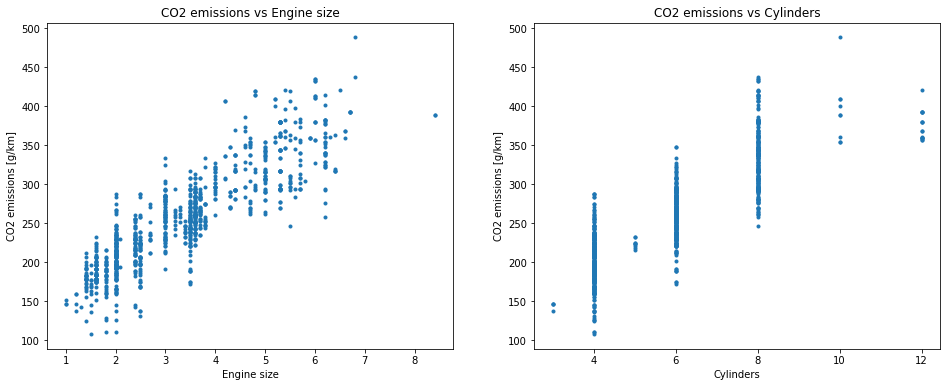

In [5]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(plot_data[:,0], plot_data[:,2],'.')
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions [g/km]')
plt.title('CO2 emissions vs Engine size')

plt.subplot(122)
plt.plot(plot_data[:,1], plot_data[:,2],'.')
plt.xlabel('Cylinders')
plt.ylabel('CO2 emissions [g/km]')
plt.title('CO2 emissions vs Cylinders')
plt.show()

<h2 id="reading_data">Visualize the data in 3D</h2>

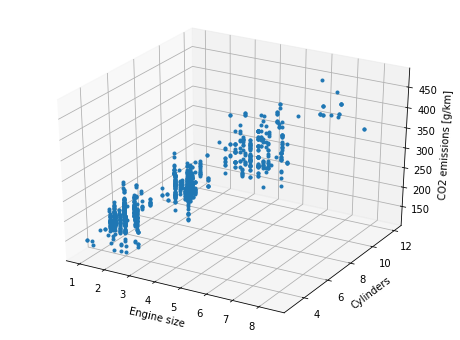

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(plot_data[:,0], plot_data[:,1], plot_data[:,2],'.')
ax.set_xlabel('Engine size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions [g/km]')

plt.show()

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [7]:
engine = plot_data[:,0]
cylind = plot_data[:,1]
CO2 = plot_data[:,2]

# Uncomment next lines to scale the features

#engine = (engine - np.mean(engine))/np.std(engine)
#cylind = (cylind - np.mean(cylind))/np.std(cylind)
#CO2 = (CO2 - np.mean(CO2))/np.std(CO2)

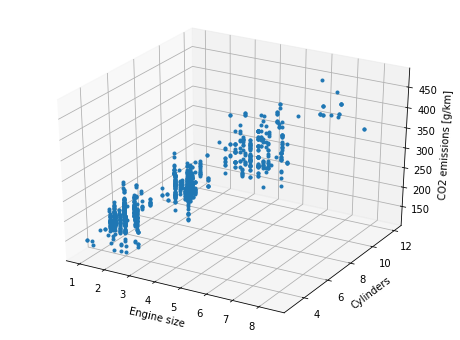

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(engine, cylind, CO2,'.')
ax.set_xlabel('Engine size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions [g/km]')

plt.show()

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [9]:
# To organize the input features in vectors (x1, x2)
X_data = list(zip(engine, cylind))

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, CO2, test_size=0.2)
print(X_test)

[(3.0, 6.0), (2.0, 4.0), (2.0, 4.0), (5.0, 8.0), (4.6, 8.0), (3.5, 6.0), (3.2, 6.0), (3.6, 6.0), (3.6, 6.0), (5.0, 8.0), (2.0, 4.0), (2.4, 4.0), (2.0, 4.0), (3.6, 6.0), (5.3, 8.0), (1.6, 4.0), (5.3, 8.0), (2.0, 4.0), (5.3, 8.0), (1.5, 4.0), (4.2, 8.0), (5.2, 10.0), (5.0, 8.0), (1.6, 4.0), (3.0, 6.0), (3.6, 6.0), (3.5, 6.0), (5.0, 8.0), (2.5, 4.0), (4.4, 8.0), (3.6, 6.0), (6.7, 12.0), (1.5, 4.0), (5.0, 8.0), (3.6, 6.0), (1.6, 4.0), (3.6, 6.0), (5.3, 8.0), (3.8, 6.0), (3.5, 6.0), (3.0, 6.0), (5.0, 8.0), (3.6, 6.0), (5.3, 8.0), (3.0, 6.0), (6.2, 8.0), (1.8, 4.0), (4.2, 8.0), (2.7, 4.0), (1.8, 4.0), (5.4, 8.0), (2.5, 5.0), (2.0, 4.0), (4.0, 6.0), (3.5, 6.0), (4.6, 8.0), (3.0, 6.0), (2.0, 4.0), (3.5, 6.0), (4.0, 6.0), (2.0, 4.0), (1.6, 4.0), (3.0, 6.0), (5.0, 8.0), (3.6, 6.0), (3.6, 6.0), (1.2, 4.0), (2.5, 6.0), (5.0, 8.0), (2.0, 4.0), (6.0, 8.0), (3.8, 6.0), (1.6, 4.0), (2.5, 4.0), (3.5, 6.0), (3.6, 6.0), (1.4, 4.0), (3.0, 6.0), (2.0, 4.0), (3.7, 6.0), (1.0, 4.0), (2.4, 4.0), (6.2, 8.0), (

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [11]:
mult_regr = linear_model.LinearRegression()
mult_regr.fit(X_train, Y_train)

print ('Coefficients: ', mult_regr.coef_)
print ('Intercept: ', mult_regr.intercept_)

Coefficients:  [28.47617321  8.64643619]
Intercept:  110.63608369213921


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [12]:
# R2 of the prediction on test set
R2 = mult_regr.score(X_test, Y_test)
print('R2 =',R2)

R2 = 0.7929769189591278


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [20]:
# Shuffle X and Y test sets in the same way randomly to get 10 random cars

test = list(zip(X_test, Y_test))
random.shuffle(test)
X_test, Y_test = zip(*test)

pred = mult_regr.predict(X_test[0:10])

print('Predictions              Real values')

# Print predicted and real values
for i in range(len(pred)):
    print([pred[i]],[Y_test[i]])

Predictions              Real values
[333.5789085320961] [382.0]
[247.94322044686982] [251.0]
[196.47894021905734] [166.0]
[313.64558728193805] [352.0]
[190.78370557615506] [184.0]
[322.18843924629147] [304.0]
[202.1741748619596] [214.0]
[185.08847093325278] [179.0]
[342.1217604964495] [354.0]
[267.87654169702785] [281.0]


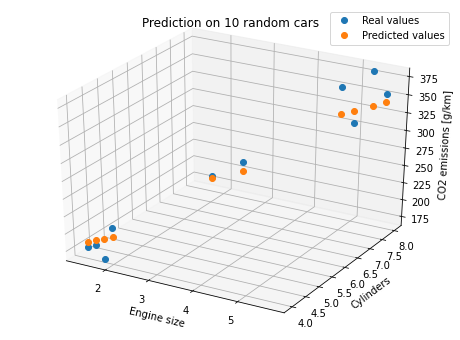

In [24]:
engine_test10, cylind_test10 = zip(*X_test[0:10])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(engine_test10, cylind_test10, Y_test[0:10],'o', label='Real values')
ax.plot(engine_test10, cylind_test10, pred, 'o', label='Predicted values')
ax.set_xlabel('Engine size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions [g/km]')
ax.set_title('Prediction on 10 random cars')
ax.legend()

plt.show()

<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [31]:
print('Metrics of the prediction on 10 random cars from test sets:\n')

MAE10 = metrics.mean_absolute_error(Y_test[0:10], pred)
MAPE10 = metrics.mean_absolute_percentage_error(Y_test[0:10], pred)
R2_10 = mult_regr.score(X_test[0:10], Y_test[0:10])

print('MAE =', MAE10)
print('MAPE =', MAPE10)
print('R2 =', R2_10)

Metrics of the prediction on 10 random cars from test sets:

MAE = 18.819936265841573
MAPE = 0.0697734735957464
R2 = 0.9022121998744309


In [32]:
print('Metrics of the prediction on all test set:\n')

Y_pred = mult_regr.predict(X_test)

MAE = metrics.mean_absolute_error(Y_test, Y_pred)
MAPE = metrics.mean_absolute_percentage_error(Y_test, Y_pred)
R2 = mult_regr.score(X_test, Y_test)

print('MAE =', MAE)
print('MAPE =', MAPE)
print('R2 =', R2)

Metrics of the prediction on all test set:

MAE = 23.691967955051737
MAPE = 0.0954377927261817
R2 = 0.7929769189591278


Parecen resultados aceptables. El último $R^2$ no está mal.